<a href="https://colab.research.google.com/github/Unfeir/DS/blob/main/hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.datasets import fashion_mnist
from keras.datasets import imdb


from keras import losses
from keras import metrics
from keras import optimizers

In [194]:
num_classes = 10
num_features = 784

learning_rate = 0.01
n_epochs = 20

batch_size = 256
batch_size2 = 512
batch_size3 = 128

n_hidden_1 = 128
n_hidden_2 = 256



In [125]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



In [139]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
x_train, x_test = x_train.astype('float32') , x_test.astype('float32')


In [172]:
# SGD
model = Sequential(
    [
        Dense(n_hidden_1, input_shape=(len(x_train[0]),), activation="relu"),
        Dense(n_hidden_2, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer=SGD(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


callback_early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    verbose=1,
    mode="max",
)

y_train_enc = keras.utils.to_categorical(y_train, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)
y_train_enc, y_test_enc

model.fit(x_train,
          y_train_enc,
          epochs=n_epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test_enc),
          verbose=1,
          callbacks=[callback_early_stopping])

Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 2.3017 - accuracy: 0.1938 - val_loss: 2.3012 - val_accuracy: 0.2721
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 2.3010 - accuracy: 0.2964 - val_loss: 2.3008 - val_accuracy: 0.3062
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 2.3007 - accuracy: 0.2799 - val_loss: 2.3006 - val_accuracy: 0.3092
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 2.3005 - accuracy: 0.3088 - val_loss: 2.3005 - val_accuracy: 0.3067
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 2.3004 - accuracy: 0.3128 - val_loss: 2.3004 - val_accuracy: 0.3355
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 2.3003 - accuracy: 0.3319 - val_loss: 2.3003 - val_accuracy: 0.3452
Epoch 7/20
235/235 [==============================] - 3s 12ms/step - loss: 2.3003 - accuracy: 0.3283 - val_loss: 2.3003 - val_accuracy: 0.3476
E

In [174]:
# sigmoid
model = Sequential(
    [
        Dense(128, input_shape=(len(x_train[0]),), activation="relu"),
        Dense(256, activation="relu"),
        Dense(10, activation="sigmoid"),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


callback_early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    verbose=1,
    mode="max",
)

y_train_enc = keras.utils.to_categorical(y_train, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)
y_train_enc, y_test_enc

model.fit(x_train,
          y_train_enc,
          epochs=n_epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test_enc),
          verbose=1,
          callbacks=[callback_early_stopping])

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 0.7914 - accuracy: 0.7029 - val_loss: 0.6045 - val_accuracy: 0.7733
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.4809 - accuracy: 0.8242 - val_loss: 0.4783 - val_accuracy: 0.8264
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.4195 - accuracy: 0.8472 - val_loss: 0.4237 - val_accuracy: 0.8444
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 0.3871 - accuracy: 0.8580 - val_loss: 0.4086 - val_accuracy: 0.8518
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.3686 - accuracy: 0.8640 - val_loss: 0.3937 - val_accuracy: 0.8561
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.3545 - accuracy: 0.8700 - val_loss: 0.3850 - val_accuracy: 0.8614
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.3342 - accuracy: 0.8780 - val_loss: 0.3856 - val_accuracy: 0.8631
E

In [176]:
# додаткові шари
model = Sequential(
    [
        Dense(128, input_shape=(len(x_train[0]),), activation="relu"),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


callback_early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    verbose=1,
    mode="max",
)

y_train_enc = keras.utils.to_categorical(y_train, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)
y_train_enc, y_test_enc

model.fit(x_train,
          y_train_enc,
          epochs=n_epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test_enc),
          verbose=1,
          callbacks=[callback_early_stopping])

Epoch 1/20
235/235 [==============================] - 5s 17ms/step - loss: 0.9368 - accuracy: 0.6217 - val_loss: 0.6399 - val_accuracy: 0.7546
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.5509 - accuracy: 0.7983 - val_loss: 0.5406 - val_accuracy: 0.7963
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.4495 - accuracy: 0.8349 - val_loss: 0.4393 - val_accuracy: 0.8341
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 0.4054 - accuracy: 0.8514 - val_loss: 0.4089 - val_accuracy: 0.8512
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3794 - accuracy: 0.8608 - val_loss: 0.4074 - val_accuracy: 0.8504
Epoch 6/20
235/235 [==============================] - 5s 21ms/step - loss: 0.3703 - accuracy: 0.8640 - val_loss: 0.4023 - val_accuracy: 0.8544
Epoch 7/20
235/235 [==============================] - 4s 15ms/step - loss: 0.3518 - accuracy: 0.8704 - val_loss: 0.3944 - val_accuracy: 0.8585

In [180]:
# RMSprop
model = Sequential(
    [
        Dense(128, input_shape=(len(x_train[0]),), activation="relu"),
        Dense(256, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


callback_early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    verbose=1,
    mode="max",
)

y_train_enc = keras.utils.to_categorical(y_train, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)
y_train_enc, y_test_enc

model.fit(x_train,
          y_train_enc,
          epochs=n_epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test_enc),
          verbose=1,
          callbacks=[callback_early_stopping])

Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 1.3198 - accuracy: 0.4715 - val_loss: 0.9269 - val_accuracy: 0.6627
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.7502 - accuracy: 0.7134 - val_loss: 0.7010 - val_accuracy: 0.7397
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.6042 - accuracy: 0.7724 - val_loss: 0.6722 - val_accuracy: 0.7386
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.5426 - accuracy: 0.7973 - val_loss: 0.5713 - val_accuracy: 0.7895
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.4955 - accuracy: 0.8145 - val_loss: 0.5450 - val_accuracy: 0.7940
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.4650 - accuracy: 0.8253 - val_loss: 0.6472 - val_accuracy: 0.7546
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.4407 - accuracy: 0.8365 - val_loss: 0.4831 - val_accuracy: 0.8204
E

In [192]:
model = Sequential(
    [
        Dense(n_hidden_1, input_shape=(len(x_train[0]),), activation="relu"),
        Dense(n_hidden_2, activation="relu"),
        Dense(n_hidden_2, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

callback_early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    verbose=1,
    mode="max",
)

y_train_enc = keras.utils.to_categorical(y_train, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)

model.fit(x_train,
          y_train_enc,
          epochs=n_epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test_enc),
          verbose=1,
          callbacks=[callback_early_stopping])

Epoch 1/20
235/235 [==============================] - 5s 15ms/step - loss: 0.8023 - accuracy: 0.6930 - val_loss: 0.5479 - val_accuracy: 0.8014
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.4908 - accuracy: 0.8216 - val_loss: 0.5458 - val_accuracy: 0.8014
Epoch 3/20
235/235 [==============================] - 4s 15ms/step - loss: 0.4245 - accuracy: 0.8450 - val_loss: 0.4400 - val_accuracy: 0.8370
Epoch 4/20
235/235 [==============================] - 4s 19ms/step - loss: 0.3840 - accuracy: 0.8589 - val_loss: 0.4452 - val_accuracy: 0.8346
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3643 - accuracy: 0.8642 - val_loss: 0.4052 - val_accuracy: 0.8526
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3518 - accuracy: 0.8688 - val_loss: 0.3810 - val_accuracy: 0.8613
Epoch 7/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3375 - accuracy: 0.8747 - val_loss: 0.3898 - val_accuracy: 0.8576

In [193]:
# batch_size +
model = Sequential(
    [
        Dense(n_hidden_1, input_shape=(len(x_train[0]),), activation="relu"),
        Dense(n_hidden_2, activation="relu"),
        Dense(n_hidden_2, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

callback_early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    verbose=1,
    mode="max",
)

y_train_enc = keras.utils.to_categorical(y_train, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)

model.fit(x_train,
          y_train_enc,
          epochs=n_epochs,
          batch_size=batch_size2,
          validation_data=(x_test, y_test_enc),
          verbose=1,
          callbacks=[callback_early_stopping])

Epoch 1/20
118/118 [==============================] - 3s 21ms/step - loss: 0.9583 - accuracy: 0.6310 - val_loss: 0.6747 - val_accuracy: 0.7560
Epoch 2/20
118/118 [==============================] - 2s 19ms/step - loss: 0.5614 - accuracy: 0.7933 - val_loss: 0.5335 - val_accuracy: 0.8074
Epoch 3/20
118/118 [==============================] - 3s 21ms/step - loss: 0.4679 - accuracy: 0.8301 - val_loss: 0.4828 - val_accuracy: 0.8284
Epoch 4/20
118/118 [==============================] - 3s 29ms/step - loss: 0.4182 - accuracy: 0.8472 - val_loss: 0.4379 - val_accuracy: 0.8389
Epoch 5/20
118/118 [==============================] - 2s 20ms/step - loss: 0.3891 - accuracy: 0.8574 - val_loss: 0.4315 - val_accuracy: 0.8446
Epoch 6/20
118/118 [==============================] - 2s 19ms/step - loss: 0.3690 - accuracy: 0.8640 - val_loss: 0.4263 - val_accuracy: 0.8444
Epoch 7/20
118/118 [==============================] - 2s 19ms/step - loss: 0.3636 - accuracy: 0.8655 - val_loss: 0.4002 - val_accuracy: 0.8573

In [195]:
# batch_size -
model = Sequential(
    [
        Dense(n_hidden_1, input_shape=(len(x_train[0]),), activation="relu"),
        Dense(n_hidden_2, activation="relu"),
        Dense(n_hidden_2, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

callback_early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    verbose=1,
    mode="max",
)

y_train_enc = keras.utils.to_categorical(y_train, num_classes)
y_test_enc = keras.utils.to_categorical(y_test, num_classes)

model.fit(x_train,
          y_train_enc,
          epochs=n_epochs,
          batch_size=batch_size3,
          validation_data=(x_test, y_test_enc),
          verbose=1,
          callbacks=[callback_early_stopping])

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.7282 - accuracy: 0.7209 - val_loss: 0.5108 - val_accuracy: 0.8145
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4531 - accuracy: 0.8341 - val_loss: 0.4313 - val_accuracy: 0.8397
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.4040 - accuracy: 0.8508 - val_loss: 0.4283 - val_accuracy: 0.8454
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.3747 - accuracy: 0.8623 - val_loss: 0.4847 - val_accuracy: 0.8178
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3557 - accuracy: 0.8686 - val_loss: 0.4021 - val_accuracy: 0.8517
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3449 - accuracy: 0.8726 - val_loss: 0.3856 - val_accuracy: 0.8594
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3283 - accuracy: 0.8781 - val_loss: 0.3693 - val_accuracy: 0.8687


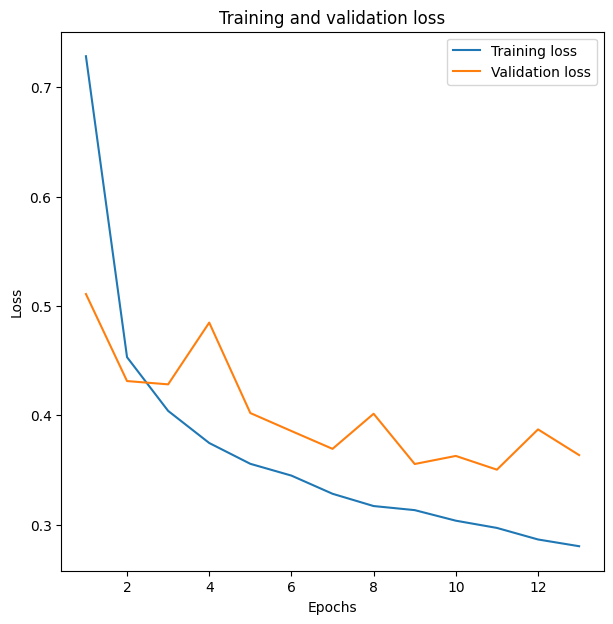

<Figure size 640x480 with 0 Axes>

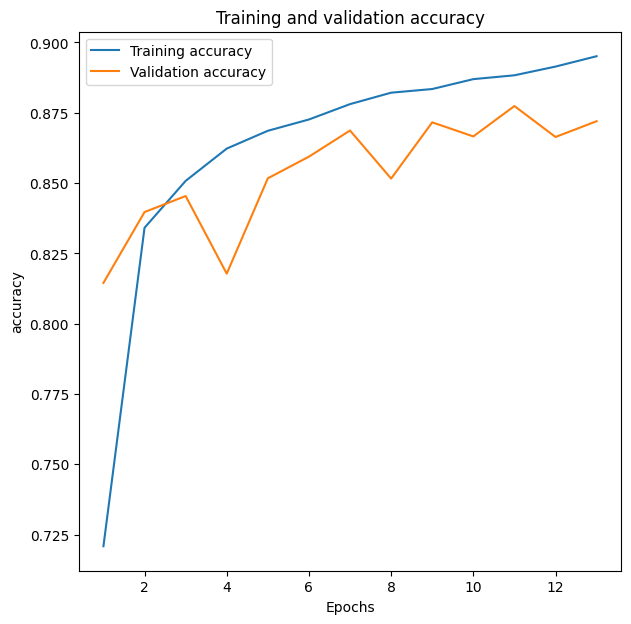

In [196]:
history = model.history.history
loss_values = history['loss']
val_loss_values = history['val_loss']

epochs = range(1, len(history['accuracy']) + 1)

plt.figure(figsize=(7, 7))
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf()
plt.figure(figsize=(7, 7))
val_acc_values = history['val_accuracy']
plt.plot(epochs, history['accuracy'], label='Training accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
Висновки:
найкращіх результатів вдалося добитися з оптимізатором Adam. Додавання шарів чи змінення їх параметрів або не давало суттєвих позитивних результатів або і взагалі приводило к оверфіту. При зменшенні batch_size модель показала трохи кращі результати.
Кількість епох не впливала на результати, оскільки навчання преривалося раніше завдяки early_stopping